<a href="https://colab.research.google.com/github/navin123456789/Nepal_Weather_Dataset/blob/main/Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/drive/MyDrive/Datasets/NepalWeatherData_labels.csv'
weather_data = pd.read_csv(file_path)

In [3]:
# Display the first few rows of the dataset
weather_data.head()

,DATE,DISTRICT,LAT,LON,PRECTOT,PS,QV2M,RH2M,T2M,T2MWET,...,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE
0,1/1/1981,Arghakhanchi,27.9,83.2,0.00,93.51,4.81,45.41,13.89,2.15,...,10.89,11.32,1.89,3.83,0.69,3.14,2.41,4.12,0.73,3.39
1,1/2/1981,Arghakhanchi,27.9,83.2,0.00,93.59,4.94,46.78,13.84,2.54,...,11.17,11.44,1.72,2.60,1.09,1.50,2.25,3.30,0.96,2.34
2,1/3/1981,Arghakhanchi,27.9,83.2,0.03,93.55,5.22,47.91,14.33,3.32,...,9.93,12.24,1.80,2.80,0.48,2.32,2.32,3.54,0.39,3.15
3,1/4/1981,Arghakhanchi,27.9,83.2,0.02,93.49,5.36,50.83,13.82,3.73,...,10.41,12.17,2.18,3.54,1.06,2.49,2.90,4.05,0.93,3.12
4,1/5/1981,Arghakhanchi,27.9,83.2,1.84,93.49,5.84,55.55,13.76,4.93,...,10.53,12.32,1.96,2.70,0.69,2.02,2.74,4.64,0.96,3.68


In [4]:
weather_data.tail()

,DATE,DISTRICT,LAT,LON,PRECTOT,PS,QV2M,RH2M,T2M,T2MWET,...,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE
883123,12/27/2019,Udayapur,26.9,86.5,0.0,95.52,4.72,54.60,11.13,2.17,...,11.01,9.73,2.38,4.20,1.25,2.94,3.40,4.57,1.37,3.20
883124,12/28/2019,Udayapur,26.9,86.5,0.0,95.73,4.23,50.90,10.56,0.60,...,13.18,9.07,2.03,2.52,1.07,1.45,3.05,4.51,1.44,3.07
883125,12/29/2019,Udayapur,26.9,86.5,0.0,95.76,4.08,46.09,11.51,0.18,...,12.30,9.12,2.01,3.01,0.85,2.17,2.97,4.12,0.94,3.18
883126,12/30/2019,Udayapur,26.9,86.5,0.0,95.84,4.44,47.07,12.47,1.32,...,12.20,9.76,1.44,1.94,0.27,1.67,2.00,3.22,0.15,3.06
883127,12/31/2019,Udayapur,26.9,86.5,0.0,95.93,5.43,49.68,14.77,3.89,...,11.68,11.67,1.59,3.22,0.45,2.78,2.02,3.43,0.66,2.77




*  How can we show the areas in Nepal that have extreme weather on a map?
*   Can we group districts with similar weather conditions together?
*   How can we predict how much it will rain using other weather information like temperature and humidity?









In [5]:
# Display basic information about the dataset
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883128 entries, 0 to 883127
Data columns (total 22 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   DATE         883128 non-null  object 
 1   DISTRICT     883128 non-null  object 
 2   LAT          883128 non-null  float64
 3   LON          883128 non-null  float64
 4   PRECTOT      883128 non-null  float64
 5   PS           883128 non-null  float64
 6   QV2M         883128 non-null  float64
 7   RH2M         883128 non-null  float64
 8   T2M          883128 non-null  float64
 9   T2MWET       883128 non-null  float64
 10  T2M_MAX      883128 non-null  float64
 11  T2M_MIN      883128 non-null  float64
 12  T2M_RANGE    883128 non-null  float64
 13  TS           883128 non-null  float64
 14  WS10M        883128 non-null  float64
 15  WS10M_MAX    883128 non-null  float64
 16  WS10M_MIN    883128 non-null  float64
 17  WS10M_RANGE  883128 non-null  float64
 18  WS50M        883128 non-

In [6]:
# Describe the dataset to get basic statistical details
weather_data.describe()


,LAT,LON,PRECTOT,PS,QV2M,RH2M,T2M,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE
count,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000
mean,27.959677,84.277419,2.433753,82.896390,8.491043,55.657950,15.815832,5.428265,21.856533,11.061186,10.795352,15.539531,2.372512,4.673551,0.666903,4.006641,2.730587,4.643453,0.924084,3.719365
std,0.883261,2.181331,6.160721,10.707984,5.426636,22.877576,9.172463,10.850204,8.848121,9.353420,3.306661,9.924091,0.685488,1.355903,0.510857,1.300380,1.001095,1.509792,0.806458,1.282227
min,26.500000,80.200000,0.000000,54.730000,0.270000,4.040000,-25.440000,-28.190000,-16.940000,-37.240000,1.310000,-33.160000,0.470000,0.970000,0.000000,0.450000,0.650000,1.120000,0.000000,0.450000
25%,27.300000,82.400000,0.000000,77.680000,3.910000,36.540000,10.070000,-2.740000,16.550000,5.410000,8.250000,9.160000,1.900000,3.730000,0.310000,3.070000,2.070000,3.610000,0.400000,2.830000
50%,27.950000,84.300000,0.050000,83.720000,6.750000,54.320000,16.730000,4.980000,22.510000,11.980000,10.920000,16.530000,2.260000,4.520000,0.530000,3.910000,2.510000,4.340000,0.680000,3.520000
75%,28.500000,85.900000,1.870000,92.740000,13.170000,77.160000,22.500000,14.780000,27.940000,17.910000,13.210000,22.880000,2.710000,5.450000,0.870000,4.840000,3.100000,5.310000,1.170000,4.390000
max,30.000000,87.900000,177.790000,100.340000,23.270000,100.000000,38.610000,27.150000,46.820000,32.770000,25.520000,41.510000,13.570000,20.210000,8.360000,16.580000,15.710000,22.850000,10.940000,18.500000


In [7]:
# Check for missing values
weather_data.isnull().sum()

DATE           0
DISTRICT       0
LAT            0
LON            0
PRECTOT        0
PS             0
QV2M           0
RH2M           0
T2M            0
T2MWET         0
T2M_MAX        0
T2M_MIN        0
T2M_RANGE      0
TS             0
WS10M          0
WS10M_MAX      0
WS10M_MIN      0
WS10M_RANGE    0
WS50M          0
WS50M_MAX      0
WS50M_MIN      0
WS50M_RANGE    0
dtype: int64

#### Here we see 24 columns but a lot of columns seem to have veg meanings. Let's understand what each columns mean
**The first 6 columns have obvious meanings , LAT and LON being lattitude and longitude. Now let's understand what rest of the columns means.**
1. PRECTOT: MERRA2 1/2x1/2 Precipitation (mm day-1)
2. PS: MERRA2 1/2x1/2 Surface Pressure (kPa)
3. QV2M: MERRA2 1/2x1/2 Specific Humidity at 2 Meters (g/kg)
4. RH2M: MERRA2 1/2x1/2 Relative Humidity at 2 Meters (%)
5. T2M: MERRA2 1/2x1/2 Temperature at 2 Meters (C)
6. T2MWET: MERRA2 1/2x1/2 Wet Bulb Temperature at 2 Meters (C)
7. T2M_MAX: MERRA2 1/2x1/2 Maximum Temperature at 2 Meters (C)
8. T2M_MIN: MERRA2 1/2x1/2 Minimum Temperature at 2 Meters (C)
9. T2M_RANGE: MERRA2 1/2x1/2 Temperature Range at 2 Meters (C)
10. TS: MERRA2 1/2x1/2 Earth Skin Temperature (C)
11. WS10M: MERRA2 1/2x1/2 Wind Speed at 10 Meters (m/s)
12. WS10M_MAX: MERRA2 1/2x1/2 Maximum Wind Speed at 10 Meters (m/s)
13. WS10M_MIN: MERRA2 1/2x1/2 Minimum Wind Speed at 10 Meters (m/s)
14. WS10M_RANGE: MERRA2 1/2x1/2 Wind Speed Range at 10 Meters (m/s)
15. WS50M: MERRA2 1/2x1/2 Wind Speed at 50 Meters (m/s)
16. WS50M_MAX: MERRA2 1/2x1/2 Maximum Wind Speed at 50 Meters (m/s)
17. WS50M_MIN: MERRA2 1/2x1/2 Minimum Wind Speed at 50 Meters (m/s)
18. WS50M_RANGE: MERRA2 1/2x1/2 Wind Speed Range at 50 Meters (m/s)

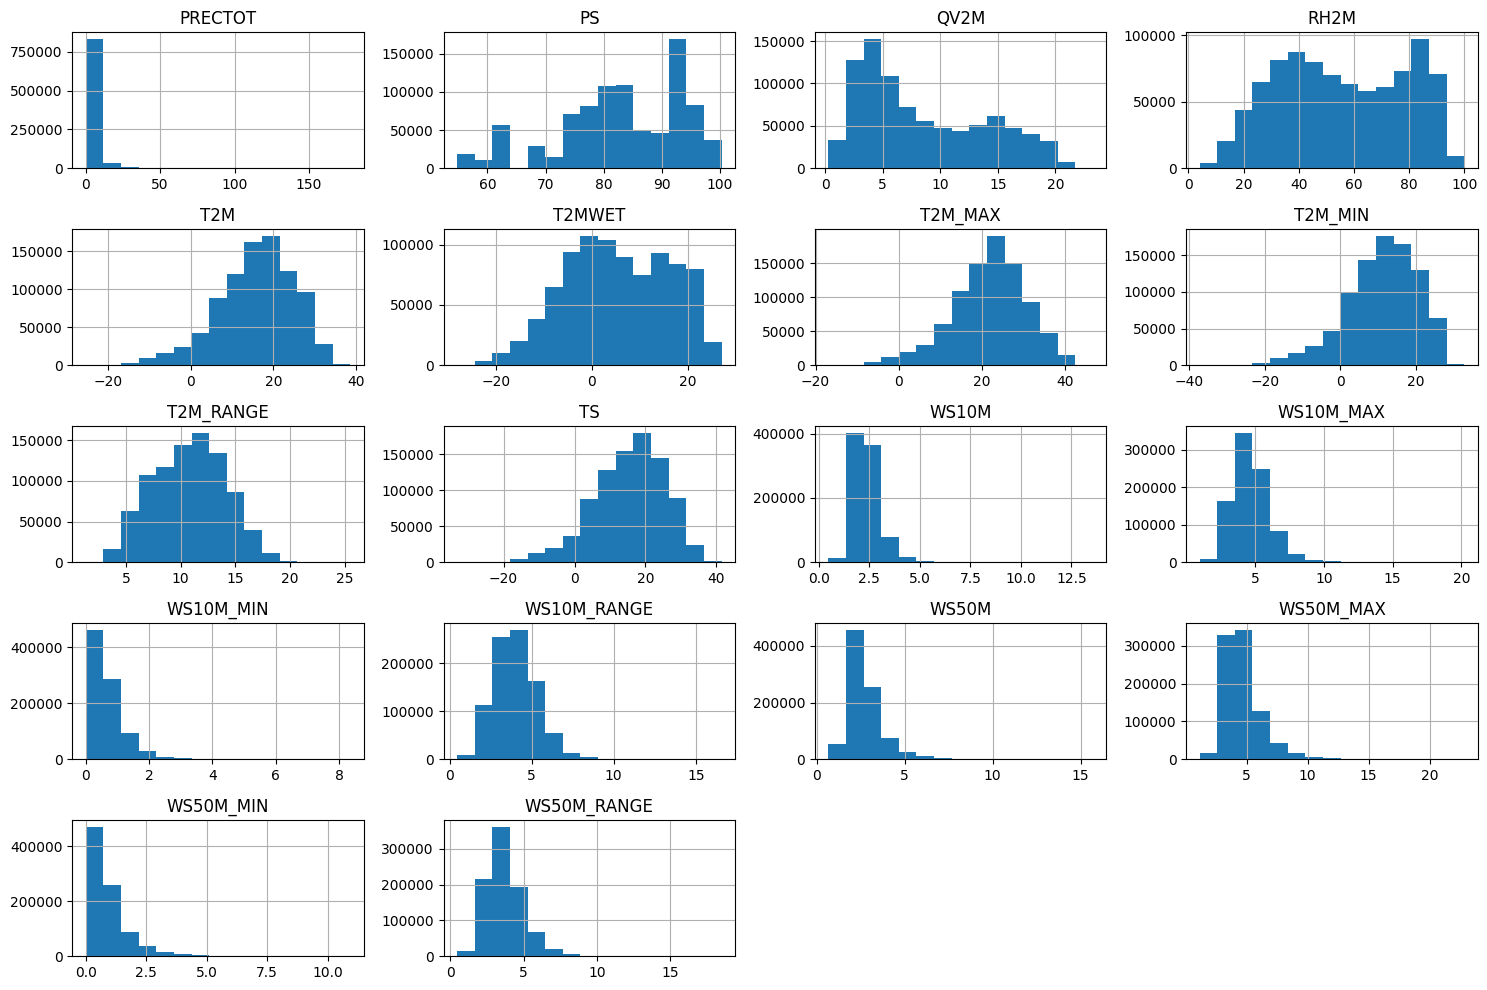

In [8]:
# Plot histograms for numeric columns
numeric_columns = ['PRECTOT', 'PS', 'QV2M', 'RH2M', 'T2M', 'T2MWET', 'T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'TS', 'WS10M', 'WS10M_MAX', 'WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN', 'WS50M_RANGE']
weather_data[numeric_columns].hist(bins=15, figsize=(15, 10), layout=(5, 4))
plt.tight_layout()
plt.show()

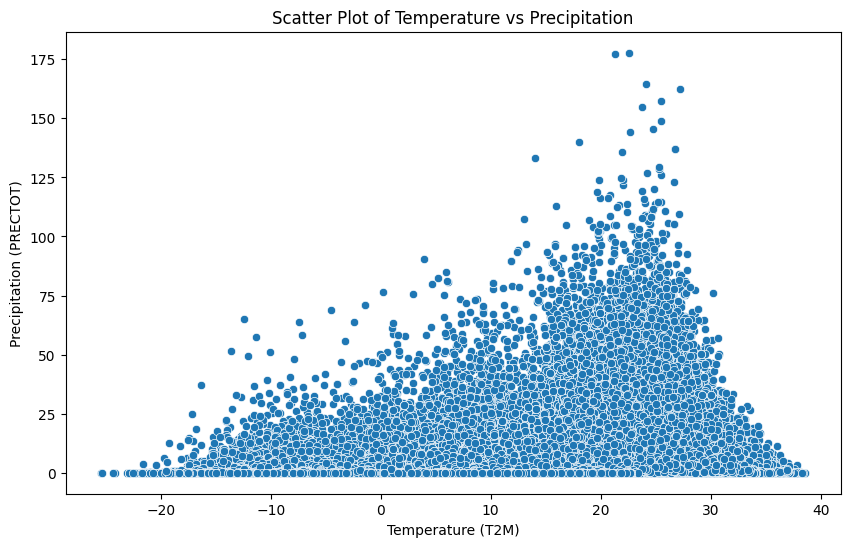

In [9]:
# Scatter plot to observe the relationship between temperature and precipitation
plt.figure(figsize=(10, 6))
sns.scatterplot(data=weather_data, x='T2M', y='PRECTOT')
plt.title('Scatter Plot of Temperature vs Precipitation')
plt.xlabel('Temperature (T2M)')
plt.ylabel('Precipitation (PRECTOT)')
plt.show()

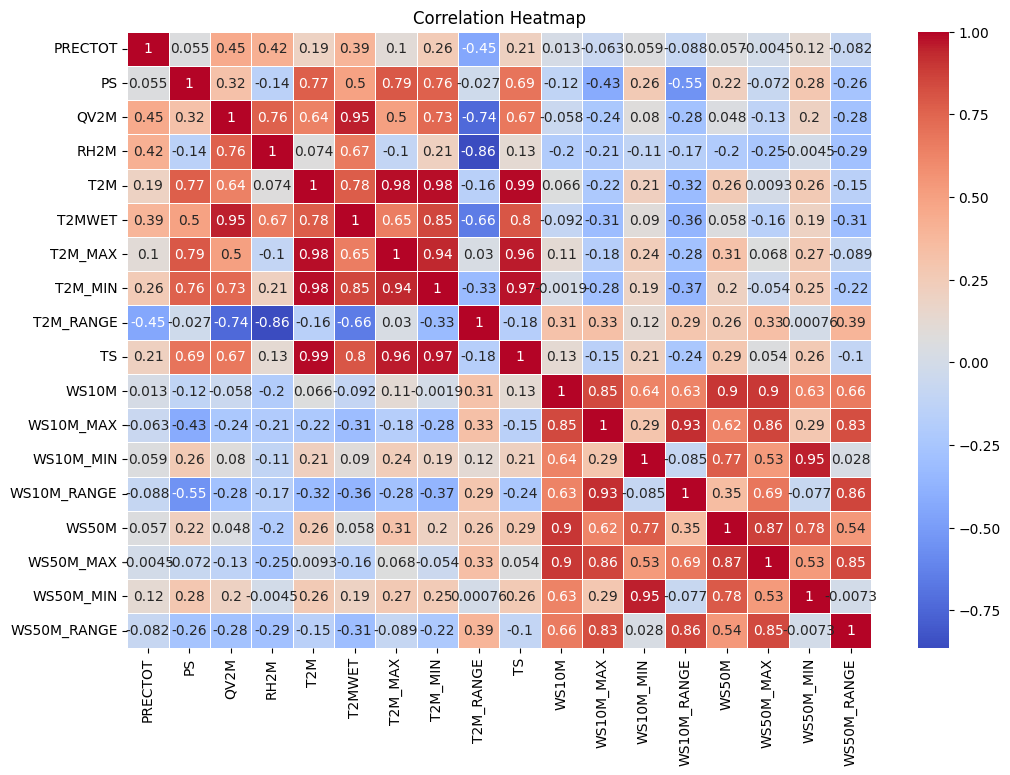

In [10]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = weather_data[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

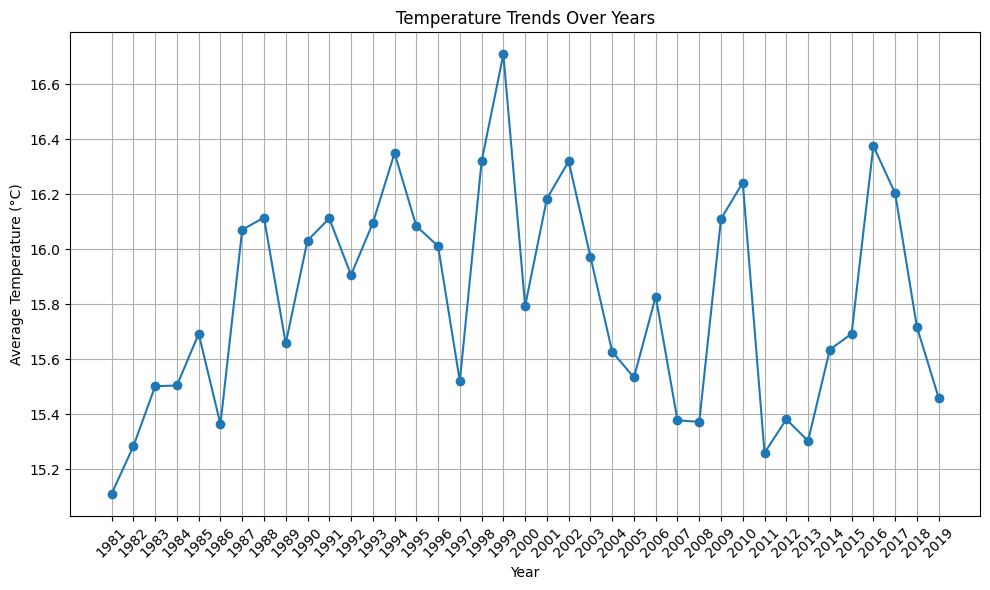

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert date column to datetime format
weather_data['DATE'] = pd.to_datetime(weather_data['DATE'])

# Extract year from the date column
weather_data['Year'] = weather_data['DATE'].dt.year

# Group data by year and calculate average temperature for each year
yearly_avg_temperature = weather_data.groupby('Year')['T2M'].mean()

# Plotting the temperature trends
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg_temperature.index, yearly_avg_temperature.values, marker='o', linestyle='-')
plt.title('Temperature Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.grid(True)
plt.xticks(yearly_avg_temperature.index, rotation=45)
plt.tight_layout()
plt.show()


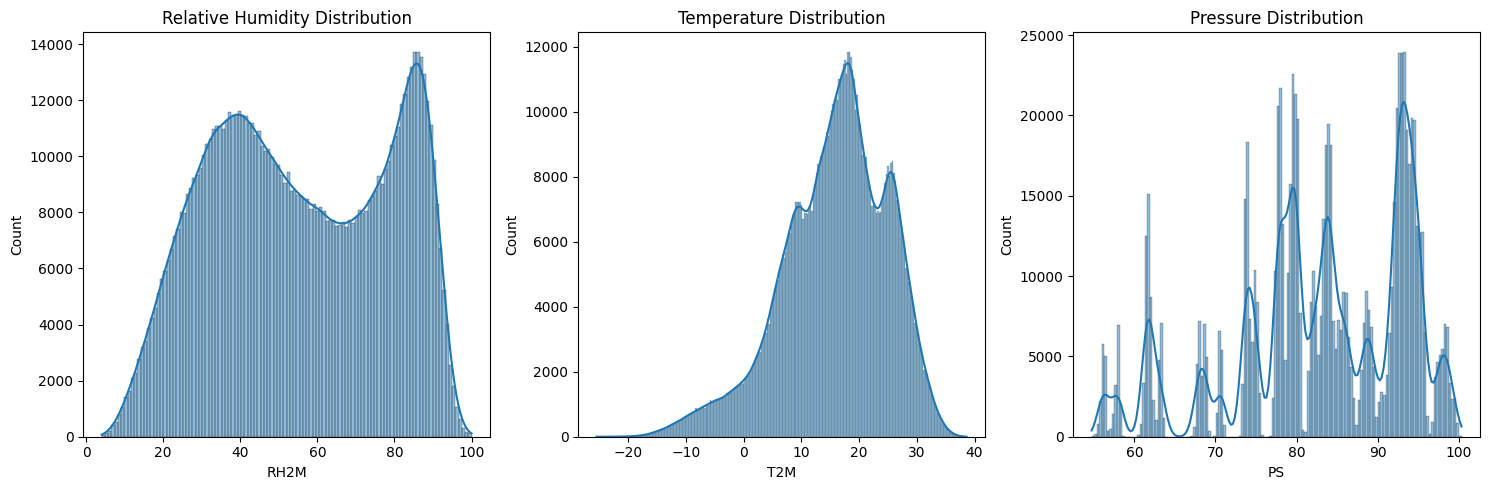

In [11]:
# Distribution of relative humidity, temperature, and pressure
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(weather_data['RH2M'], kde=True)
plt.title('Relative Humidity Distribution')

plt.subplot(1, 3, 2)
sns.histplot(weather_data['T2M'], kde=True)
plt.title('Temperature Distribution')

plt.subplot(1, 3, 3)
sns.histplot(weather_data['PS'], kde=True)
plt.title('Pressure Distribution')
plt.tight_layout()
plt.show()

In [14]:
# Regression Analysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Example: Predicting temp (T2M) based on other features
X = weather_data[['PRECTOT', 'PS', 'QV2M', 'RH2M']]
y = weather_data['T2M']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [16]:
# Predictions
y_pred = model.predict(X_test)
y_pred

array([17.4384335 , 23.94792042,  4.46354131, ..., 15.11962687,
       10.56552053, 10.32742471])

In [17]:
# Create a DataFrame to hold actual and predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results.head()

,Actual,Predicted
756449,16.57,17.438434
734766,24.52,23.947920
254377,8.63,4.463541
757493,13.17,14.367190
639385,19.11,17.944601


In [18]:
# Evaluation
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 9.8040937085963


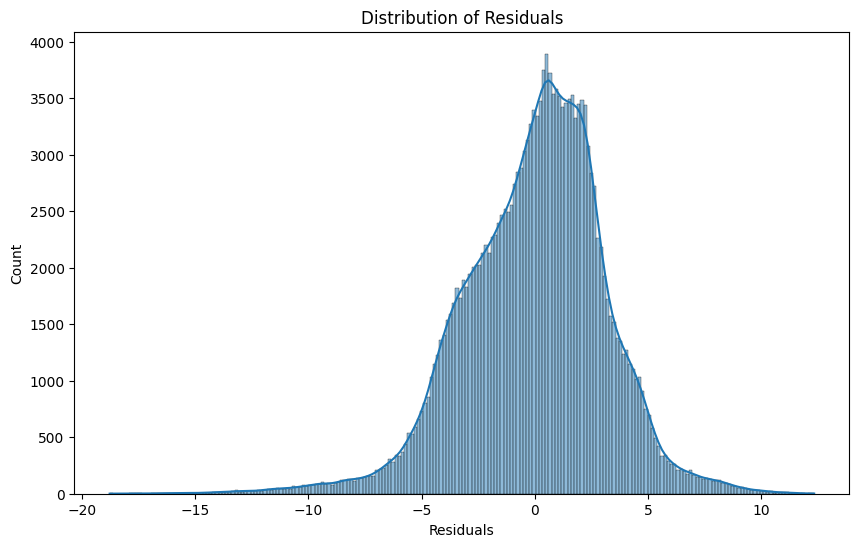

In [19]:
# Plotting residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.show()

In [21]:
!pip install contextily
!pip install geopandas
!pip install shapely


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 67.0 MB/s eta 0:00:00


<ipython-input-29-9c0dcbe302e3>:26: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


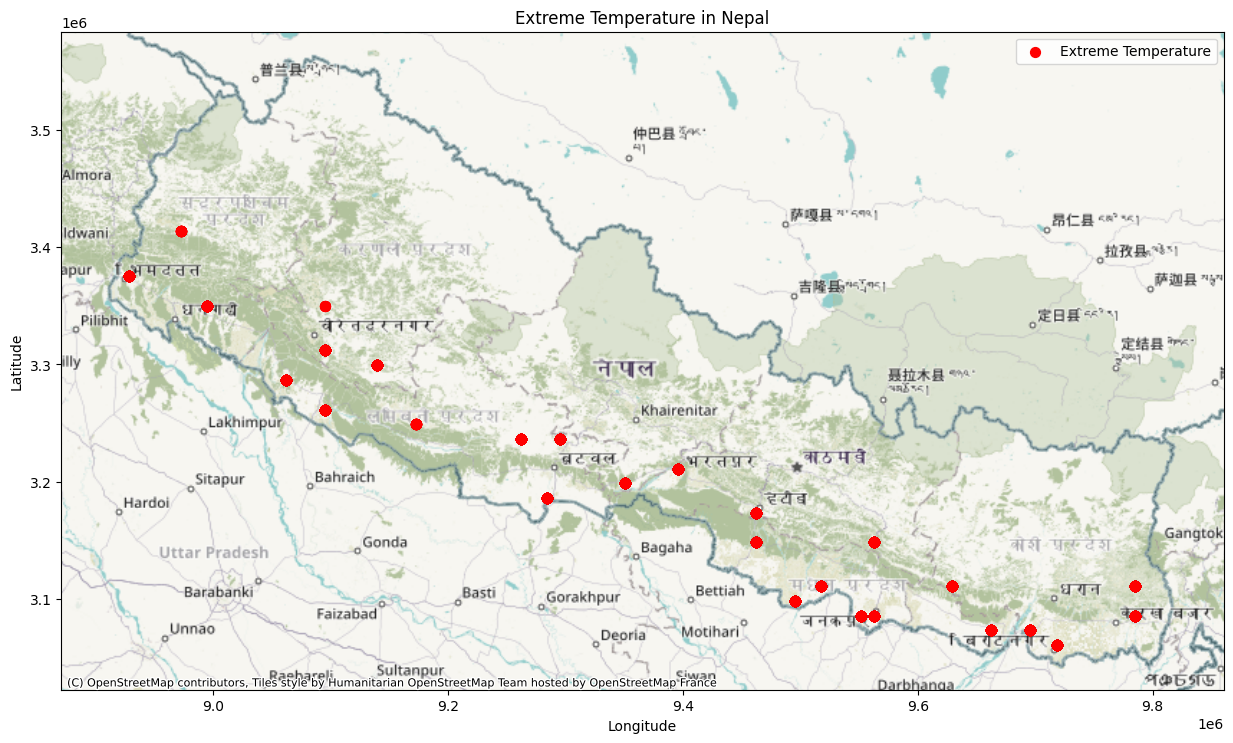

In [29]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import contextily as ctx


# Define thresholds based on quantiles
temperature_threshold = weather_data['T2M'].quantile(0.95)
earth_skin_temp_threshold = weather_data['TS'].quantile(0.95)

# Filter extreme weather events based on the thresholds
extreme_events = weather_data[
    (weather_data['T2M'] > temperature_threshold) &
    (weather_data['TS'] > earth_skin_temp_threshold)
]

# Create a GeoDataFrame for extreme weather events
geometry = [Point(xy) for xy in zip(extreme_events['LON'], extreme_events['LAT'])]
gdf = gpd.GeoDataFrame(extreme_events, geometry=geometry)

# Set the CRS for the GeoDataFrame (assuming the coordinates are in WGS84)
gdf.set_crs(epsg=4326, inplace=True)

# Use the Natural Earth dataset provided within geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Extract Nepal from the world GeoDataFrame
nepal = world[world.name == 'Nepal']

# Plotting the extreme weather events on the Nepal map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
nepal.to_crs(epsg=3857).plot(ax=ax, color=(0.9, 0.9, 0.9, 0.0), edgecolor=(0.9, 0.9, 0.9, 0.0))  # Fully transparent color
gdf.to_crs(epsg=3857).plot(ax=ax, markersize=50, color='red', marker='o', label='Extreme Temperature')

# Add a basemap
ctx.add_basemap(ax, crs=nepal.to_crs(epsg=3857).crs)

plt.legend()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Extreme Temperature in Nepal')
plt.show()


<ipython-input-30-0c6bc4d9efef>:30: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


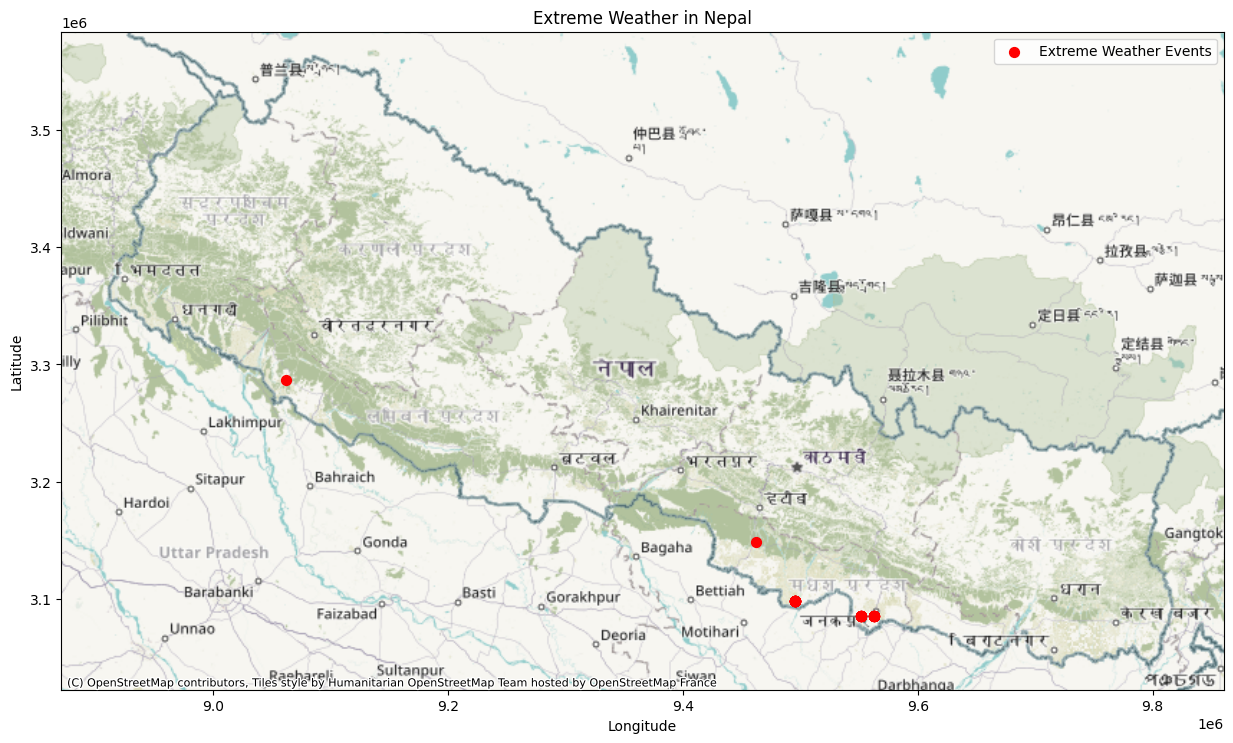

In [30]:
# Importing necessary libraries
import pandas as pd

# Assuming weather_data is a DataFrame containing the weather data

# Define thresholds based on quantiles
precipitation_threshold = weather_data['PRECTOT'].quantile(0.9)
temperature_threshold = weather_data['T2M'].quantile(0.9)
humidity_threshold = weather_data['RH2M'].quantile(0.9)
wind_speed_threshold = weather_data['WS10M'].quantile(0.9)
earth_skin_temp_threshold = weather_data['TS'].quantile(0.9)

# Filter extreme weather events based on the thresholds
extreme_events = weather_data[
    (weather_data['PRECTOT'] > precipitation_threshold) &
    (weather_data['T2M'] > temperature_threshold) &
    (weather_data['RH2M'] > humidity_threshold) &
    (weather_data['WS10M'] > wind_speed_threshold) &
    (weather_data['TS'] > earth_skin_temp_threshold)
]

# Create a GeoDataFrame for extreme weather events
geometry = [Point(xy) for xy in zip(extreme_events['LON'], extreme_events['LAT'])]
gdf = gpd.GeoDataFrame(extreme_events, geometry=geometry)

# Set the CRS for the GeoDataFrame (assuming the coordinates are in WGS84)
gdf.set_crs(epsg=4326, inplace=True)

# Use the Natural Earth dataset provided within geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Extract Nepal from the world GeoDataFrame
nepal = world[world.name == 'Nepal']

# Plotting the extreme weather events on the Nepal map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
nepal.to_crs(epsg=3857).plot(ax=ax, color=(0.9, 0.9, 0.9, 0.0), edgecolor=(0.9, 0.9, 0.9, 0.0))  # Fully transparent color
gdf.to_crs(epsg=3857).plot(ax=ax, markersize=50, color='red', marker='o', label='Extreme Weather Events')

# Add a basemap
ctx.add_basemap(ax, crs=nepal.to_crs(epsg=3857).crs)

plt.legend()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Extreme Weather in Nepal')
plt.show()


In [27]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


# Aggregate data by district to get average weather metrics
district_data = weather_data.groupby('DISTRICT').agg({
    'LAT': 'mean',
    'LON': 'mean',
    'PRECTOT': 'mean',
    'T2M_MAX': 'mean',
    'T2M_MIN': 'mean',
    'RH2M': 'mean',
    'WS10M': 'mean'
}).reset_index()

# Select relevant weather features for clustering
features = ['PRECTOT', 'T2M_MAX', 'T2M_MIN', 'RH2M', 'WS10M']
district_features = district_data[features]

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(district_features)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

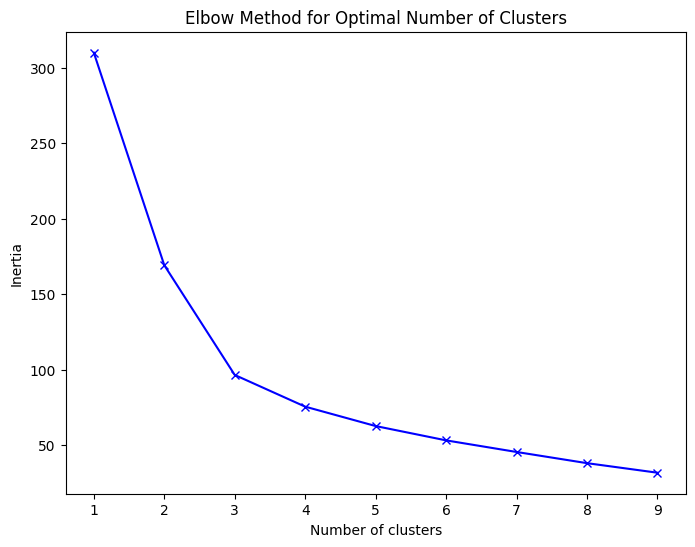

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [28]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the elbow method
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

# Choose the appropriate number of clusters based on the elbow curve
optimal_k = 3  # Adjust this based on the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
district_data['Cluster'] = kmeans.fit_predict(scaled_features)


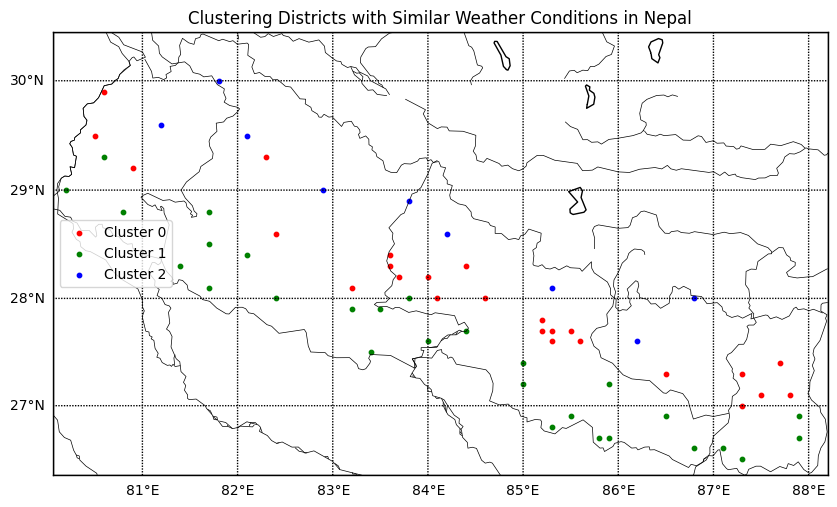

In [30]:
import geopandas as gpd
from shapely.geometry import Point
from mpl_toolkits.basemap import Basemap

# Create GeoDataFrame for the district data
geometry = [Point(xy) for xy in zip(weather_data.LON, weather_data.LAT)]
gdf = gpd.GeoDataFrame(weather_data, geometry=geometry)

# Plotting the clusters on a map
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Create Basemap instance
m = Basemap(
    projection='merc',
    llcrnrlat=26.347, urcrnrlat=30.446,
    llcrnrlon=80.058, urcrnrlon=88.201,
    resolution='i', ax=ax
)

# Draw map details
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary()
m.drawrivers()
m.drawparallels(np.arange(26., 31., 1.), labels=[1,0,0,0])
m.drawmeridians(np.arange(80., 89., 1.), labels=[0,0,0,1])

# Convert lat/lon to map projection coordinates
x, y = m(weather_data['LON'].values, weather_data['LAT'].values)

# Plot clusters
colors = ['red', 'green', 'blue', 'purple', 'orange']
for cluster in range(optimal_k):
    cluster_data = district_data[district_data['Cluster'] == cluster]
    x_cluster, y_cluster = m(cluster_data['LON'].values, cluster_data['LAT'].values)
    m.scatter(x_cluster, y_cluster, s=10, color=colors[cluster], label=f'Cluster {cluster+1}')

plt.legend()
plt.title('Clustering Districts with Similar Weather Conditions in Nepal')
plt.show()
